<a href="https://colab.research.google.com/github/stephsallum/astr21/blob/main/sections3to5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASTR21 Winter 2025 Sections 3-5 Notebook

In this notebook, we'll plot some spectra from the [Pickles stellar classification atlas](https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs/pickles-atlas). We'll work in groups to classify a spectrum by looking at its lines and at where its spectrum peaks in brightness.

First we'll import some useful modules and also grab the data from GitHub.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import astropy.io.fits as pyfits

In [2]:
!wget https://github.com/stephsallum/astr21/raw/refs/heads/main/secs3to5_data.zip
!unzip secs3to5_data.zip

--2025-02-14 20:21:16--  https://github.com/stephsallum/astr21/raw/refs/heads/main/secs3to5_data.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/stephsallum/astr21/refs/heads/main/secs3to5_data.zip [following]
--2025-02-14 20:21:16--  https://raw.githubusercontent.com/stephsallum/astr21/refs/heads/main/secs3to5_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220142 (215K) [application/zip]
Saving to: ‘secs3to5_data.zip’

secs3to5_data.zip   100%[===================>] 214.98K  --.-KB/s    in 0.03s   

2025-02-14 20:21:16 (6.14 MB/s) - ‘secs3to5_data.zip’ saved [220142/220142]

Archiv

## FITS Files

The files in the now-unzipped directory are called ".fits files." They are the most common file format used to store astronomical data. We'll be loading real observed stellar spectra from these fits files using a module called astropy. You can read more about the files on the [FITS Wikipedia page.](https://https://en.wikipedia.org/wiki/FITS).

The spectra in the directory have been renamed "spectrum_N.fits" where N can run from 1 to 6.

Let's define a function to load up a spectrum with one of those numbers, and then plot it! We'll add some optional keywords to plot some vertical lines on top of the spectrum, which we'll use later in the notebook!

In [3]:
def plot_spectrum(num,vlines=[]):

  #load spectrum with number "num"
  a = pyfits.getdata('secs3to5_data/spectrum_'+str(num)+'.fits')
  #organize the data into wavelengths and fluxes
  wavelengths = np.array([a[x][0] for x in range(len(a))])
  fluxes = np.array([a[x][1] for x in range(len(a))])

  #plot spectrum
  f = plt.figure()
  f.add_subplot(111)
  plt.title('Spectrum '+str(num))
  plt.plot(wavelengths,fluxes,label='Spectrum '+str(num))
  plt.xlabel('Wavelength (Angstroms)')
  plt.ylabel('Brightness (Arb. Units)')
  plt.xlim(0,10000)

  #add any vertical lines to help us mark important parts of the spectrum
  cmap = mpl.colormaps['viridis']

  # Take colors at regular intervals spanning the colormap.
  for xx in range(len(vlines)):
    line=vlines[xx]
    plt.axvline(line,label=r'$\lambda=$'+str(line),lw=10,alpha=0.5,
                c=cmap(xx/len(vlines)))

  #add a legend
  plt.legend()

  #show the plot
  plt.show()

  return

Now let's run the function and make a plot! For now we won't pass any vertical lines to the function - we'll just plot the spectrum for file number 1!

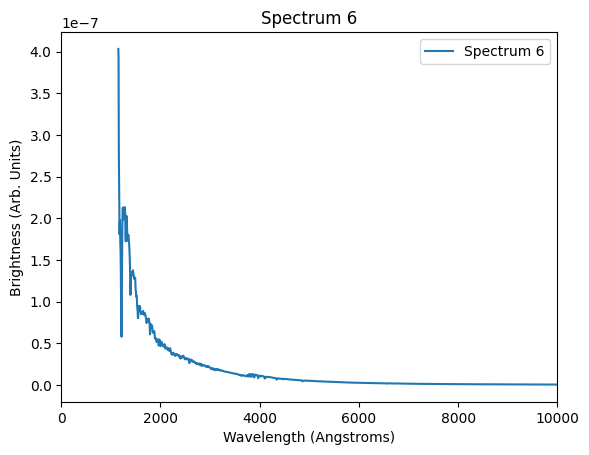

In [11]:
plot_spectrum(6)

## Wien's Displacement Law and Spectral Lines

To help us classify the spectra, we'll define a function that will spit out the peak wavelength, in Angstroms, of a blackbody of a given temperature. We'll also reference a table of useful spectral lines!

In [5]:
def peak_lambda(T):

  # This function takes a temperature T in units of K and
  # calculates the peak wavelength of a blackbody of that
  # temperature in units of Angstroms.

  l_mm = 2.898 / T #peak wavelength in mm
  l_AA = l_mm * 1e7 #conversion to Angstroms
  return l_AA

In [6]:
#Let's try it! We can print the peak wavelength of a 10,000 K blackbody:

peak_lambda(2500)

11592.0

The peak wavelength of the cell above makes sense, since 2898 Angstroms is 289.8 nm, solidly in the UV part of the electromagnetic spectrum. This can help us estimate the temperature of the stars!

The tables in this cell is taken from the [SDSS website](https://skyserver.sdss.org/dr1/en/proj/basic/spectraltypes/lines.asp). There are also a few other version of the OBAFGKM mnemonic at the top. Note that the line wavelengths are approximate!

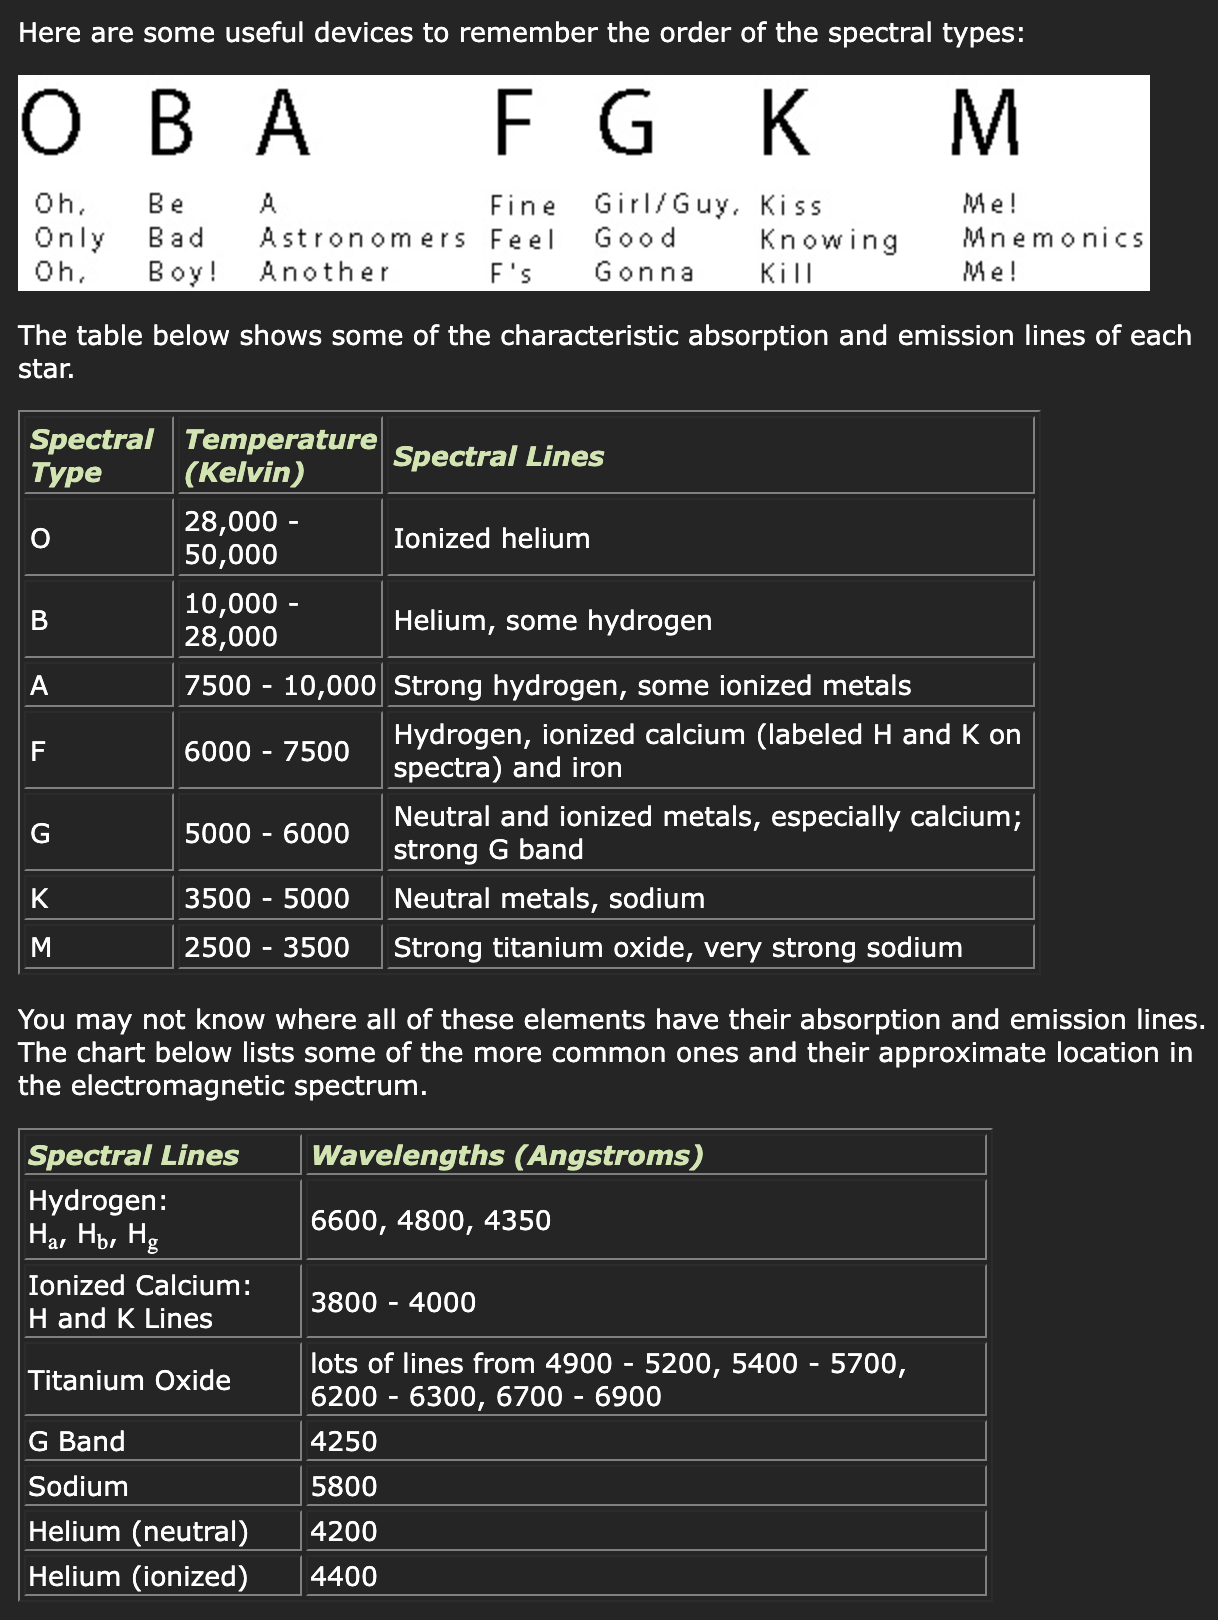

# Putting it all together!

The next couple of cells make the plot again, and show you how to plot vertical lines on top of your spectrum to mark the positions of different spectral lines. Follow these steps to work with your team to classify one star:

1. Choose a number from 1-6 with your team! Run the following cell to plot the spectrum for that file number.

2. Re-run the peak_lambda function in the following cell for different temperatures (by re-executing the cell), until you feel like you've identified the rough peak of your star's spectrum if it were a blackbody.

3. Look at the spectrum and pick out some features that you might be able to connect to the wavelengths in the table above. Make a list of those lines and enter it in the "lines" list that is currently empty (see comment in the cell below).

4. Re-run the cell after filling in the "lines" list, and vertical lines will appear at those locations. Note that the entries in the SDSS table are approximate! This means that they might not fall right on top of lines in your spectrum, but they will be close.

5. Use a combination of your peak wavelength and identified lines to guess the spectral type of your star! All stars are luminosity class V, so we're just looking for the rough spectral type.

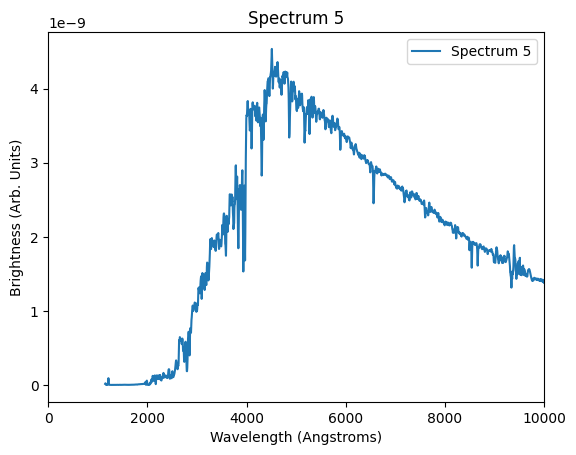

In [ ]:
#change the number inside the plot_spectrum function to plot your spectrum!

### when you are ready (after you have gotten a rough peak wavelength
### from the follwing cell!) put line wavelengths into the "lines" list to
### add vertical lines to the plot. as an example, to plot H-alpha
### and Sodium, you'd do [6600,5800]

lines = []
plot_spectrum(5,vlines=lines)

In [ ]:
#run this cell with different temperatures inside the peak_lambda function
#and then compare the output to the rough peak of your spectrum plotted above
#keep changing the temperature until you think you've roughly measured its
#temperature

#when you are done, go back to the cell above and plot your spectral lines to
#finish up your spectral type estimate!

peak_lambda(2500)

11592.0